# Tutorial

In [1]:
import aquarius_webportal

import matplotlib.pyplot as plt
from matplotlib import dates as mdates

## Establish connection to the website

To demonstrate I'll create three connections to different examples of Aquarius Web Portal implementations, all configured in different ways, using different versions of the software.

In [7]:
SA = aquarius_webportal.AquariusWebPortal("water.data.sa.gov.au")
NZ = aquarius_webportal.AquariusWebPortal("hydrowebportal.niwa.co.nz")
NT = aquarius_webportal.AquariusWebPortal("ntg.aquaticinformatics.net")

## Getting a list of parameters

For some portals you can get back a list of parameters:

In [8]:
params = NZ.fetch_params()
params

,param_id,param_name,param_desc
0,180,Alkalinity,Alkalinity As CaCO3
1,426,NH4-N (Dis),Ammonia
2,194,BOD,Biochemical Oxygen Demand
3,196,Ca (Dis),Calcium (Dissolved)
4,204,Cl (Dis),Chloride (Dissolved)
5,379,O2 (Dis),Dissolved Oxygen Concentration
6,425,DRP-P,Dissolved Reactive Phosphorus
7,281,Mg (Dis),Magnesium (Dissolved)
8,101,NO3+NO2 as N,Nitrite and Nitrate as N
9,98,N (Tot),Nitrogen Total (Water)


Unfortunately some portals have a disclaimer pop-up when you first visit the website. 

For these, we get no information on the parameters via the script, because it can't accept the disclaimer.

In [9]:
NT.fetch_params()

,param_id,param_name,param_desc


## Getting a list of locations (sites)

For either type of portal you can fetch a list of locations:

In [10]:
df = NT.fetch_locations()

In [11]:
df

,wp_loc_id,lon,lat,loc_name,loc_id,loc_type,loc_folder,classification,bgcolor,seq
0,792,134.767896,-22.131885,Sandover River - #7 Bore,G0010001,River/Stream,All Locations.DEPWS.Water.Public,-,#FFFFFF,0
1,794,137.017840,-20.046888,Ranken River - Soudan Homestead,G0010005,River/Stream,All Locations.DEPWS.Water.Public,-,#FFFFFF,0
2,793,137.501189,-20.015182,James River - Avon Downs Police Station,G0010006,River/Stream,All Locations.DEPWS.Water.Public,-,#FFFFFF,0
3,796,137.917874,-22.231837,Manners Crk U/S Tobermory Homestead,G0010007,River/Stream,All Locations.DEPWS.Water.Public,-,#FFFFFF,0
4,795,136.817886,-22.565183,Algamba Crk D/S Tarlton Downs Homestead,G0010008,River/Stream,All Locations.DEPWS.Water.Public,-,#FFFFFF,0
...,...,...,...,...,...,...,...,...,...,...
5006,6937,131.443095,-12.733012,"Barr Rd, Marrakai",RN043557,Groundwater,All Locations.DEPWS.Water.Public,-,#FFFFFF,0
5007,6939,131.420997,-12.706886,"Leaning tree lagoon, Marrakai",RN043558,Groundwater,All Locations.DEPWS.Water.Public,-,#FFFFFF,0
5008,5475,134.945581,-21.386522,Murray Downs Station Corridor Bore 1 - Verdent...,RN050056,Groundwater,All Locations.DEPWS.Water.Public,-,#FFFFFF,0
5009,5476,134.835990,-21.335627,Corridor Bore 2 - Verdent Minerals,RN050057,Groundwater,All Locations.DEPWS.Water.Public,-,#FFFFFF,0


## Getting a list of datasets for portals which are not blocked by a disclaimer

Now let's say you want a complete list of datasets (time-series). We can obtain this by querying the website for a particular parameter.

If the portal you are using does not have a disclaimer, you are in luck. You could either iterate over all the parameters, or just those which you are interested in:

In [12]:
level_params = params[params.param_name.str.contains("Discharge")]
level_params

,param_id,param_name,param_desc
26,427,Discharge Value,Assigned Discharge Value
27,327,Discharge,Discharge


In [13]:
datasets = NZ.fetch_datasets(param_id=327)
datasets

,wp_loc_id,wp_dset_id,lon,lat,loc_name,loc_id,dset_name,loc_type,loc_folder,State,dset_start,dset_end,classification,bgcolor,seq,param,label
0,41,90,176.507797,-38.176369,Tarawera at Lake Outlet Recorder,15341,Discharge.Master@15341,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1971-11-01T13:15:00,2023-11-02T10:20:00,-,#FFFFFF,0,Discharge,Master
1,41,17084,176.507797,-38.176369,Tarawera at Lake Outlet Recorder,15341,Discharge.Field Visits@15341,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1971-11-08T10:30:00,2023-10-18T10:53:43,-,#FFFFFF,0,Discharge,Field Visits
2,42,16909,176.995102,-38.005138,Whakatane at Whakatane,15514,Discharge.Field Visits@15514,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1952-07-10T13:30:00,2023-09-22T12:16:04.5,-,#FFFFFF,0,Discharge,Field Visits
3,42,92,176.995102,-38.005138,Whakatane at Whakatane,15514,Discharge.Master@15514,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1956-07-31T15:00:00,2023-11-02T10:20:00,-,#FFFFFF,0,Discharge,Master
4,43,98,177.632294,-37.863701,Motu at Houpoto,16501,Discharge.Master@16501,Hydrometric Station,All Locations.NIWA.BenchMark,CLOSED: 2 days,1957-04-08T15:00:00,2023-11-02T10:00:00,-,#FFFFFF,0,Discharge,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,23,49,172.386398,-41.763481,Buller at Longford,93202,Discharge.Master@93202,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1963-10-11T12:00:00,2023-11-02T10:10:00,-,#FFFFFF,0,Discharge,Master
79,17,17059,171.699402,-41.834251,Buller at Te Kuha,93203,Discharge.Field Visits@93203,Hydrometric Station,All Locations.NIWA.BenchMark,CLOSED: 2 days,1963-10-22T13:45:00,2023-03-06T11:21:33.5,-,#FFFFFF,0,Discharge,Field Visits
80,17,20514,171.699402,-41.834251,Buller at Te Kuha,93203,Discharge.Master@93203,Hydrometric Station,All Locations.NIWA.BenchMark,CLOSED: 2 days,1963-07-30T03:00:00,2023-11-02T10:20:00,-,#FFFFFF,0,Discharge,Master
81,16,16844,172.220200,-41.254211,Karamea at Gorge,95102,Discharge.Field Visits@95102,Hydrometric Station,All Locations.NIWA.BenchMark,CLOSED: 2 days,1978-03-23T14:40:00,2023-10-26T10:51:00,-,#FFFFFF,0,Discharge,Field Visits


The key fields for datasets are:

In [14]:
datasets[["loc_id", "loc_name", "param", "label", "dset_start", "dset_end"]]

,loc_id,loc_name,param,label,dset_start,dset_end
0,15341,Tarawera at Lake Outlet Recorder,Discharge,Master,1971-11-01T13:15:00,2023-11-02T10:20:00
1,15341,Tarawera at Lake Outlet Recorder,Discharge,Field Visits,1971-11-08T10:30:00,2023-10-18T10:53:43
2,15514,Whakatane at Whakatane,Discharge,Field Visits,1952-07-10T13:30:00,2023-09-22T12:16:04.5
3,15514,Whakatane at Whakatane,Discharge,Master,1956-07-31T15:00:00,2023-11-02T10:20:00
4,16501,Motu at Houpoto,Discharge,Master,1957-04-08T15:00:00,2023-11-02T10:00:00
...,...,...,...,...,...,...
78,93202,Buller at Longford,Discharge,Master,1963-10-11T12:00:00,2023-11-02T10:10:00
79,93203,Buller at Te Kuha,Discharge,Field Visits,1963-10-22T13:45:00,2023-03-06T11:21:33.5
80,93203,Buller at Te Kuha,Discharge,Master,1963-07-30T03:00:00,2023-11-02T10:20:00
81,95102,Karamea at Gorge,Discharge,Field Visits,1978-03-23T14:40:00,2023-10-26T10:51:00


Note also that Aquarius combines these into what they call a dataset name:

``{param}.{label}@{location_id}``

In [15]:
datasets[["param", "label", "loc_id", "dset_name"]]

,param,label,loc_id,dset_name
0,Discharge,Master,15341,Discharge.Master@15341
1,Discharge,Field Visits,15341,Discharge.Field Visits@15341
2,Discharge,Field Visits,15514,Discharge.Field Visits@15514
3,Discharge,Master,15514,Discharge.Master@15514
4,Discharge,Master,16501,Discharge.Master@16501
...,...,...,...,...
78,Discharge,Master,93202,Discharge.Master@93202
79,Discharge,Field Visits,93203,Discharge.Field Visits@93203
80,Discharge,Master,93203,Discharge.Master@93203
81,Discharge,Field Visits,95102,Discharge.Field Visits@95102


## Getting a list of datasets for disclaimer-blocked portals

Before I go on to show how you can get actual timeseries data for these datasets, let's cover what to do if you want a list of timeseries but are using a portal that has a disclaimer, such that ``params = aq.fetch_params()`` returns nothing.

In this case you can iterate at random numbers trying to identify valid ``param_id`` values - these integers relate to the how the database was provisioned and configured, and are unlikely to go above 300 or 400. That's a bit crude though! 

A better way is to use a Python session:

First load the offending portal and click through the disclaimer. Find a page where the "Select Parameter" dropdown is visible - the "List" or "Map" pages will work.

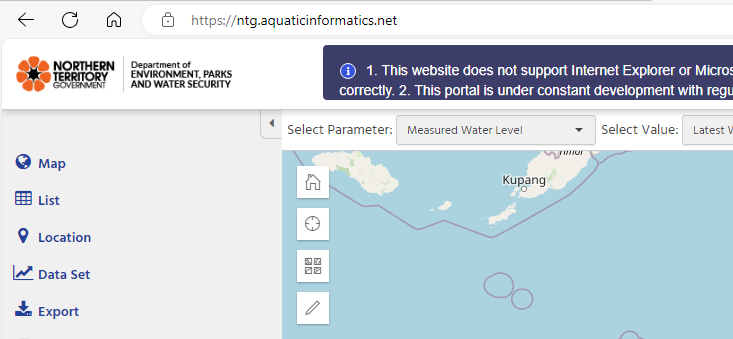

Press Ctrl+U to view the source and copy that into your Python notebook:

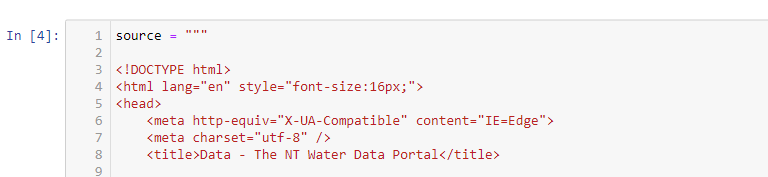

Run this code: ``params = aquarius_webportal.parse_params_from_html(source)``

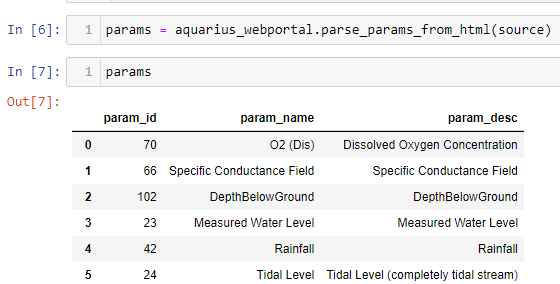

Done :-) You can save these in a spreadsheet locally and use this as per normal. They may break if the website does an upgrade.

## Accessing timeseries data for a dataset


In [16]:
datasets

,wp_loc_id,wp_dset_id,lon,lat,loc_name,loc_id,dset_name,loc_type,loc_folder,State,dset_start,dset_end,classification,bgcolor,seq,param,label
0,41,90,176.507797,-38.176369,Tarawera at Lake Outlet Recorder,15341,Discharge.Master@15341,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1971-11-01T13:15:00,2023-11-02T10:20:00,-,#FFFFFF,0,Discharge,Master
1,41,17084,176.507797,-38.176369,Tarawera at Lake Outlet Recorder,15341,Discharge.Field Visits@15341,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1971-11-08T10:30:00,2023-10-18T10:53:43,-,#FFFFFF,0,Discharge,Field Visits
2,42,16909,176.995102,-38.005138,Whakatane at Whakatane,15514,Discharge.Field Visits@15514,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1952-07-10T13:30:00,2023-09-22T12:16:04.5,-,#FFFFFF,0,Discharge,Field Visits
3,42,92,176.995102,-38.005138,Whakatane at Whakatane,15514,Discharge.Master@15514,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1956-07-31T15:00:00,2023-11-02T10:20:00,-,#FFFFFF,0,Discharge,Master
4,43,98,177.632294,-37.863701,Motu at Houpoto,16501,Discharge.Master@16501,Hydrometric Station,All Locations.NIWA.BenchMark,CLOSED: 2 days,1957-04-08T15:00:00,2023-11-02T10:00:00,-,#FFFFFF,0,Discharge,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,23,49,172.386398,-41.763481,Buller at Longford,93202,Discharge.Master@93202,Hydrometric Station,All Locations.NIWA.BenchMark,OPEN,1963-10-11T12:00:00,2023-11-02T10:10:00,-,#FFFFFF,0,Discharge,Master
79,17,17059,171.699402,-41.834251,Buller at Te Kuha,93203,Discharge.Field Visits@93203,Hydrometric Station,All Locations.NIWA.BenchMark,CLOSED: 2 days,1963-10-22T13:45:00,2023-03-06T11:21:33.5,-,#FFFFFF,0,Discharge,Field Visits
80,17,20514,171.699402,-41.834251,Buller at Te Kuha,93203,Discharge.Master@93203,Hydrometric Station,All Locations.NIWA.BenchMark,CLOSED: 2 days,1963-07-30T03:00:00,2023-11-02T10:20:00,-,#FFFFFF,0,Discharge,Master
81,16,16844,172.220200,-41.254211,Karamea at Gorge,95102,Discharge.Field Visits@95102,Hydrometric Station,All Locations.NIWA.BenchMark,CLOSED: 2 days,1978-03-23T14:40:00,2023-10-26T10:51:00,-,#FFFFFF,0,Discharge,Field Visits


In [17]:
discharge = NZ.fetch_dataset("Discharge.Master@95102", start="2021-01-01", finish="2022-01-01", extra_data_types="all")
discharge

,Discharge (m^3/s),Grade Code,Approval Level,Interpolation Type
Timestamp (UTC+12:00),,,,
2021-01-01 00:00:00+12:00,44.90,600,1200,1
2021-01-01 00:05:00+12:00,44.90,600,1200,1
2021-01-01 00:10:00+12:00,44.77,600,1200,1
2021-01-01 00:15:00+12:00,44.77,600,1200,1
2021-01-01 00:20:00+12:00,44.77,600,1200,1
...,...,...,...,...
2021-12-31 23:40:00+12:00,41.79,600,1200,1
2021-12-31 23:45:00+12:00,41.79,600,1200,1
2021-12-31 23:50:00+12:00,41.79,600,1200,1


<Axes: xlabel='Timestamp (UTC+12:00)'>

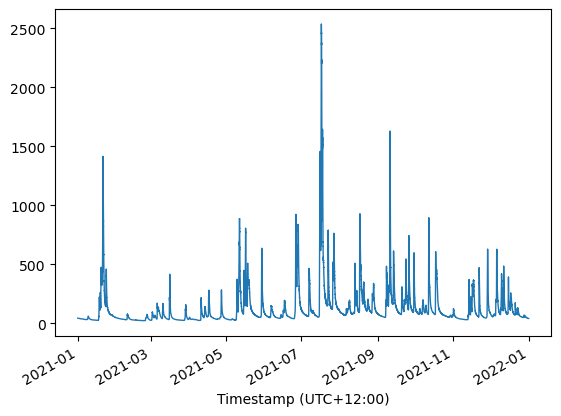

In [18]:
discharge["Discharge (m^3/s)"].plot(lw=1)